# **Tarea 2:** **Problemas de Busqueda**

**Miguel Sebastian Navarro Islas**

In [4]:
import numpy as pd
import random

### **Problema 1:** Modela el juego de las torres de Hanói como un problema de búsqueda.

**Estado inicial:** <br>
Todas las piezas se encuentran ordenadas en el primer poste, por ejemplo:

In [5]:
init = [[1,2,3,4,5,6,7],[],[]]

**Acciones:**<br>
Mover la primer pieza de un poste hacia otro poste, siempre y cuando el poste este vacío o su primer pieza sea una pieza más grande que la que se va a mover.

In [6]:
oneaction = [[2,3,4,5,6,7],[],[1]]

**Costo:**<br>
Cada acción tiene costo de 1 <br>
La función de costo regresa 1 sin importar _a_ o _s_

**Sucesores:** <br>
Los sucesores de un estado se obtienen tomando la primer pieza de un poste y revisando si se puede colocar en otro poste. <br>
La función _Succ(s,a)_ se encarga de revisar estos estados y regresar los estados válidos

**Estado final:**

El estado final es cuando el último poste tiene todas las piezas ordenadas. <br>

In [7]:
end = [[],[],[1,2,3,4,5,6,7]]

La función _IsEnd(s)_ verifica que _s_ sea igual que la lista del ejemplo _end_

### **Problema 2:** Escribe un programa de Python que genere un tablero de Sudoku resuelto de forma aleatoria de tamaño $9\times9$.  No busques algoritmos para lograr esto, en su lugar, plantea una idea clave para resolver el problema y asegúrate que tu implementación sea lo más clara y entendible que puedas.

In [8]:
def sudoku():
    board = pd.zeros((9,9), dtype = int)   # initialize a 9x9 grid with zeros
    numbers = [i+1 for i in range(9)]
    # Generate a random solved Sudoku board using backtracking algorithm
    def backtrack(board):
        for row in range(9):
            for col in range(9):
                if board[row][col] == 0:
                    random.shuffle(numbers)
                    for num in numbers:
                        if is_valid(board, row, col, num):
                            board[row][col] = num
                            if backtrack(board):
                                return True
                            board[row][col] = 0
                    return False
        return True
    
    # Check if a number is valid to place in a given cell
    def is_valid(board, row, col, num):
        # Check row and column
        for i in range(9):
            if board[row][i] == num or board[i][col] == num:
                return False
        # Check 3x3 box
        box_row = row - row % 3
        box_col = col - col % 3
        for i in range(box_row, box_row+3):
            for j in range(box_col, box_col+3):
                if board[i][j] == num:
                    return False
        return True
    
    # Generate a random solved Sudoku board
    backtrack(board)
    return board

In [17]:
sudoku()

array([[6, 1, 4, 7, 9, 2, 8, 5, 3],
       [7, 2, 3, 6, 5, 8, 9, 4, 1],
       [5, 9, 8, 1, 4, 3, 6, 7, 2],
       [8, 6, 9, 5, 3, 4, 2, 1, 7],
       [3, 4, 2, 9, 1, 7, 5, 6, 8],
       [1, 5, 7, 2, 8, 6, 4, 3, 9],
       [4, 3, 1, 8, 2, 5, 7, 9, 6],
       [9, 8, 6, 4, 7, 1, 3, 2, 5],
       [2, 7, 5, 3, 6, 9, 1, 8, 4]])

### **Problema 3:**  Escribe una implementación de `backtrackingSearch` que sea funcionalmente equivalente a la implementación de arriba sin utilizar variables fuera del ámbito local de una función.

In [10]:
def backtrackingSearch(problem):
    def findBest(state, path, cost, bestCost=float('+inf'), bestPath=None):
        if problem.isEnd(state):
            if cost<bestCost:
                bestCost = cost
                bestPath = path
            return bestCost, bestPath
        for action, next_state, next_cost in edges(problem, state):
            bestCost, bestPath = findBest(next_state,
                     path + [(action, next_state, next_cost)],
                     cost + next_cost,
                     bestCost = bestCost,
                     bestPath = bestPath)
        return bestCost, bestPath
    return findBest(state = problem.initialState(),
                    path = [],
                    cost = 0)

### **Problema 4:** Observa que tanto la implementación de `futureCosts` como de `dynamicProgramming` iteran sobre las aristas del estado actual. Programa una mejor implementación combinando las ideas de ambas funciones.

In [18]:
def dynamicProgramming(problem):
    costs = {}
    def futureCosts(state):
        if problem.isEnd(state):
            costs[state]=0
        if state in costs:
            return costs[state]
        costs[state] = min(next_cost + futureCost(next_state) for action, next_state,next_cost in edges(problem,state))
        return costs[state]
    futureCosts(problem.initialState())
    return costs

### **Problema 5:** ¿Por qué el algoritmo de Dijkstra no puede trabajar con pesos negativos? ¿Qué pasa si le sumamos a todos los pesos el peso mínimo de la gráfica? Presenta una gráfica dirigida ponderada en donde esta "solución" no funciona.

El algoritmo de Dijkstra no puede trabajar con pesos negativos debido a la manera en la que explora los estados. Como siempre busca el menor costo, puede encontrar problemas cuando se tiene un ciclo de costos negativos (ya que el costo de un nodo a cualquier otro nodo dentro de este ciclo va a ser menor a cualquier costo positivo) o también si se tiene un camino con un costo negativo por medio, es posible que el algoritmo no lo encuentre. Es decir, tomando la siguiente grafica: <br>
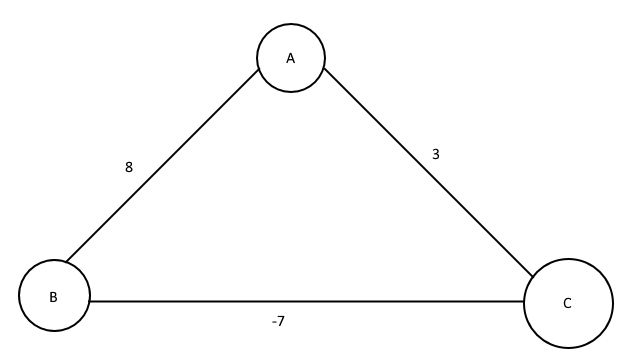 <br>
El algoritmo tomara la ruta A, C como la ruta menos costosa para llegar a C, sin embargo, la ruta A, B, C tiene menor costo.

Sumar el costo minimo no es una buena solución para todas las gráficas ya que si un camino es más largo que otro (pero sigue siendo el camino óptimo) es probable que este camino deje de ser el camino optimo ya que se le agregara el costo minimo por cada nodo que se incluya en el camino. Por ejemplo: <br>
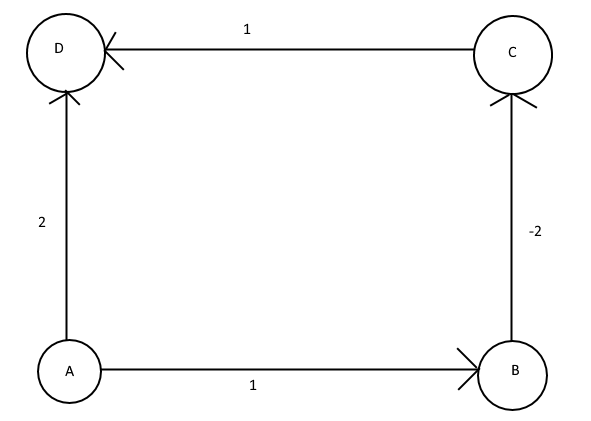<br>
En esta gráfica, si sumamos el minimo (2) a cada nodo, el costo del camino A, B, C, D sería 6 (0 +3 + 0 + 3) mientras que el costo del camino A, D sería 2. Sin embargo, cuando no sumamos el minimo, el camino óptimo deberia de ser A, B, C, D por lo tanto sumar el costo minimo a la gráfica no funciona.